In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
election_type = "first_round"
year = 2021

df = pd.read_csv(f"data_output/Chile/{year}_{election_type}_polling_station.csv.gz")
df_location = pd.read_csv(f"data_output/Chile/{year}_{election_type}_polling_station_location.csv.gz")

data = pd.merge(df.query("flag_candidates == 1"), df_location, on="polling_id")
data = data.groupby(["commune", "candidate"]).agg({"value": "sum"})
data["share"] = data.groupby(level=[0], group_keys=False).apply(lambda x: x/x.sum())
data = data.reset_index()
data["commune"] = data["commune"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data.head()

,commune,candidate,value,share
0,ALGARROBO,EDUARDO ARTES BRICHETTI,90.0,0.011038
1,ALGARROBO,FRANCO PARISI FERNANDEZ,568.0,0.069659
2,ALGARROBO,GABRIEL BORIC FONT,1978.0,0.242580
3,ALGARROBO,JOSE ANTONIO KAST RIST,2877.0,0.352833
4,ALGARROBO,MARCO ENRIQUEZ-OMINAMI GUMUCIO,472.0,0.057886


In [57]:
poverty = pd.read_excel(
  "https://observatorio.ministeriodesarrollosocial.gob.cl/storage/docs/pobreza-comunal/2022/Estimaciones_Tasa_Pobreza_Ingresos_Comunas_2022.xlsx",
  header=2
)

# poverty = pd.read_excel(
#   "https://observatorio.ministeriodesarrollosocial.gob.cl/storage/docs/pobreza-comunal/2022/Estimaciones_Indice_Pobreza_Multidimensional_Comunas_2022.xlsx",
#   header=2
# )

# poverty = poverty[["Nombre comuna", "Porcentaje de personas en situación de pobreza multidimensional 2022"]].dropna()

poverty = poverty[["Nombre comuna", "Porcentaje de personas en situación de pobreza por ingresos 2022"]].dropna()
poverty.columns = ["commune", "poverty"]
poverty["commune"] = poverty["commune"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
poverty["commune"] = poverty["commune"].replace({
  "MARCHIHUE": "MARCHIGUE",
  "OHIGGINS": "O'HIGGINS",
  "TREGUACO": "TREHUACO",
  "CABO DE HORNOS": "CABO DE HORNOS(EX-NAVARINO)"
})

          poverty     value     share
poverty  1.000000 -0.386484 -0.592548
value   -0.386484  1.000000  0.546366
share   -0.592548  0.546366  1.000000
(346, 5)


C:\Users\cnava\AppData\Local\Temp\ipykernel_7948\1644856475.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(frag.corr())


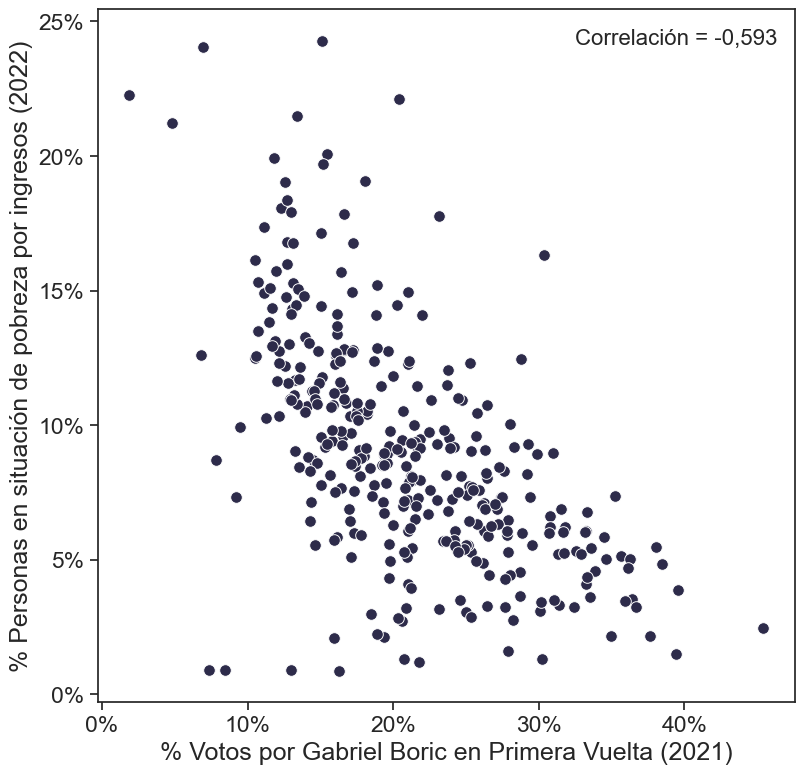

In [91]:
frag = pd.merge(poverty, data[data["candidate"] == "GABRIEL BORIC FONT"], on="commune", how="outer")
# frag = pd.merge(poverty, data[data["candidate"] == "EN CONTRA"], on="commune", how="outer")
print(frag.corr())
print(frag.shape)

sns.set_theme(font_scale=1.5, style="ticks")
fig, ax = plt.subplots(figsize=(9, 9), dpi=100)
sns.scatterplot(x="share", y="poverty", color="#2D2B4A", s=70, data=frag)

ax.set_xlabel("% Votos por Gabriel Boric en Primera Vuelta (2021)")
ax.set_ylabel("% Personas en situación de pobreza por ingresos (2022)")

plt.text(0.975, 0.95, "Correlación = -0,593", ha="right", transform=ax.transAxes, fontsize=16)

def percentage(x, pos):
    return '%1.0f%%' % (x * 100)
from matplotlib.ticker import FuncFormatter

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(percentage))
ax.yaxis.set_major_formatter(FuncFormatter(percentage))

<AxesSubplot: >

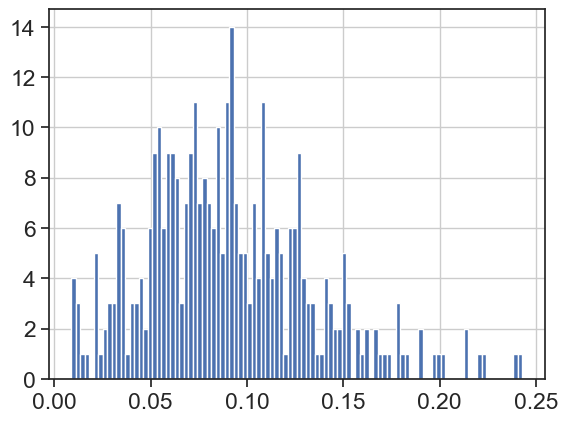

In [79]:
frag.poverty.hist(bins=100)